In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock, minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import euclidean, cityblock, minkowski

In [ ]:
path = r"/content/glass.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


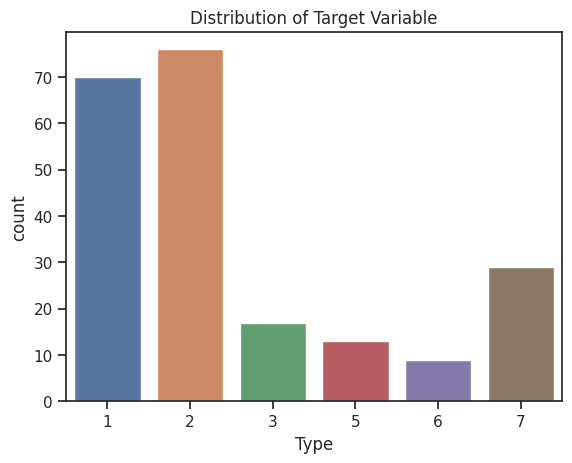

In [ ]:
sns.countplot(x='Type', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
feature_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [ ]:
point1 = df.loc[0, feature_columns]
point2 = df.loc[1, feature_columns]

In [ ]:
euclidean_dist = euclidean(point1, point2)
manhattan_dist = cityblock(point1, point2)
minkowski_dist = minkowski(point1, point2, p=3)

print('Euclidean Distance:', euclidean_dist)
print('Manhattan Distance:', manhattan_dist)
print('Minkowski Distance:', minkowski_dist)

Euclidean Distance: 1.6874571283443043
Manhattan Distance: 3.693400000000003
Minkowski Distance: 1.3477917330550984


In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9 1 1 0 0 0]
 [5 9 0 0 0 0]
 [2 0 1 0 0 0]
 [0 2 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 0 0 1 7]]
              precision    recall  f1-score   support

           1       0.56      0.82      0.67        11
           2       0.69      0.64      0.67        14
           3       0.50      0.33      0.40         3
           5       1.00      0.25      0.40         4
           6       0.50      0.33      0.40         3
           7       0.78      0.88      0.82         8

    accuracy                           0.65        43
   macro avg       0.67      0.54      0.56        43
weighted avg       0.68      0.65      0.63        43



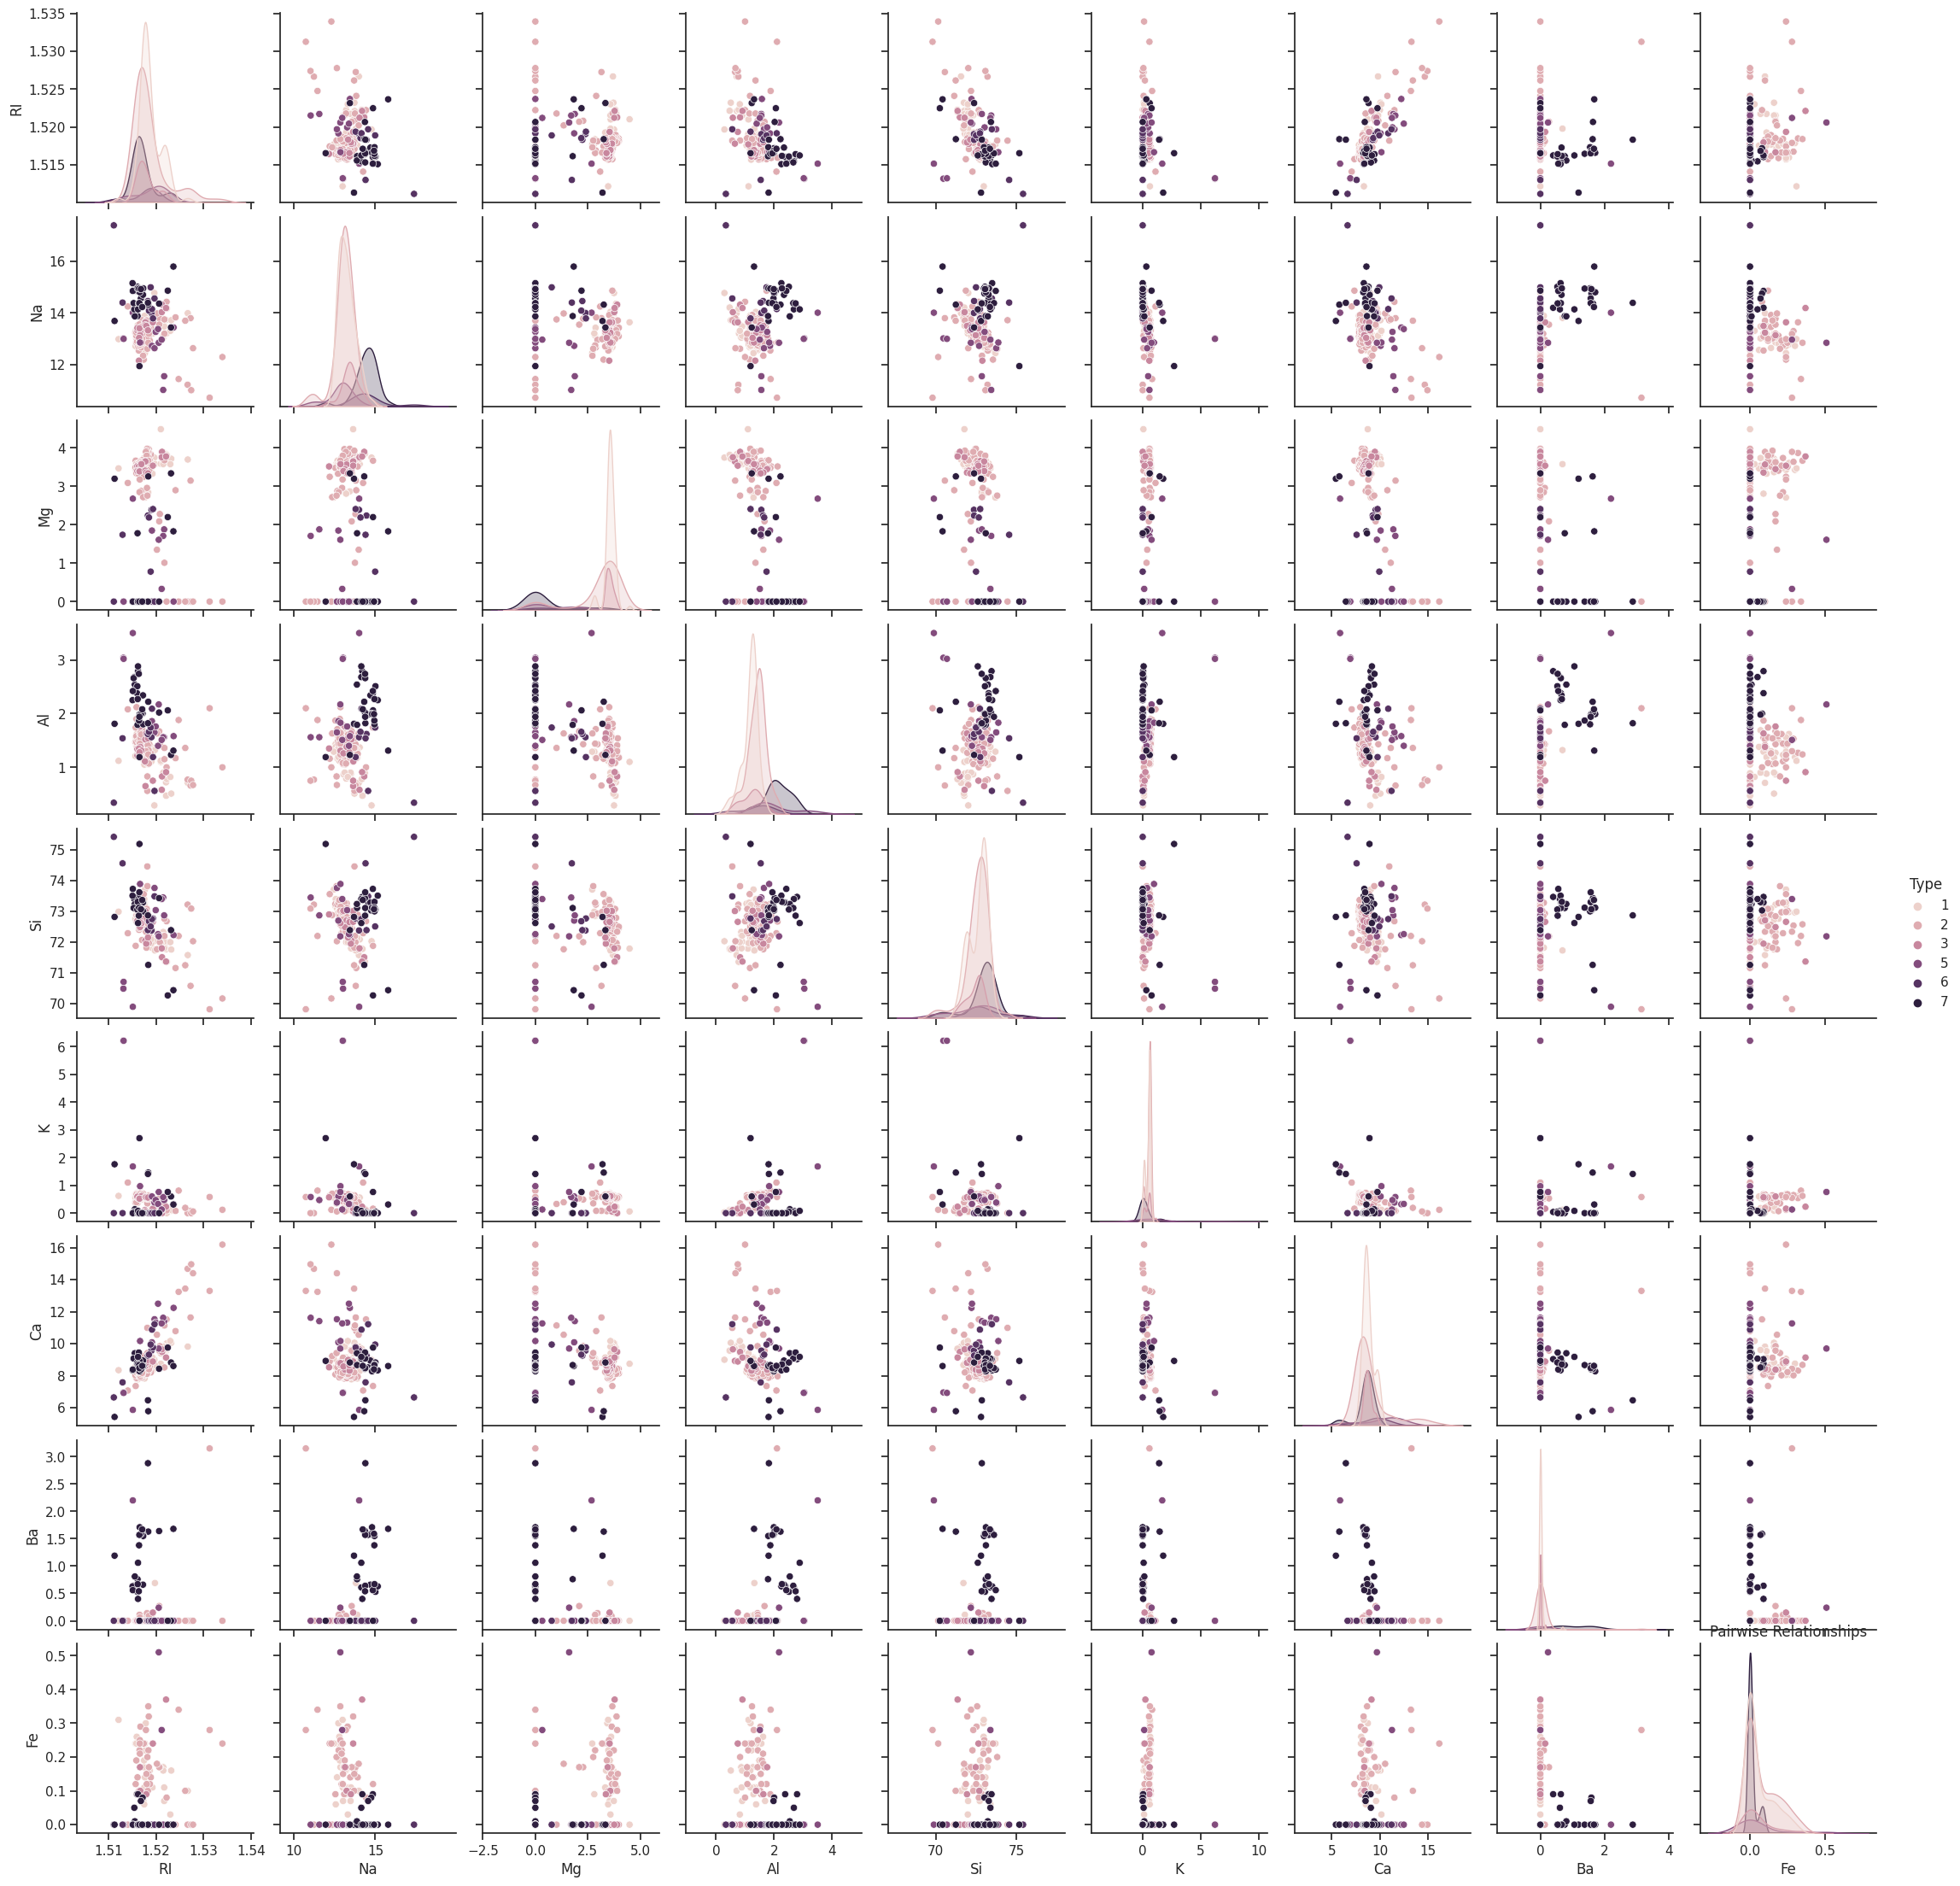

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue='Type')
plt.title('Pairwise Relationships')
plt.show()

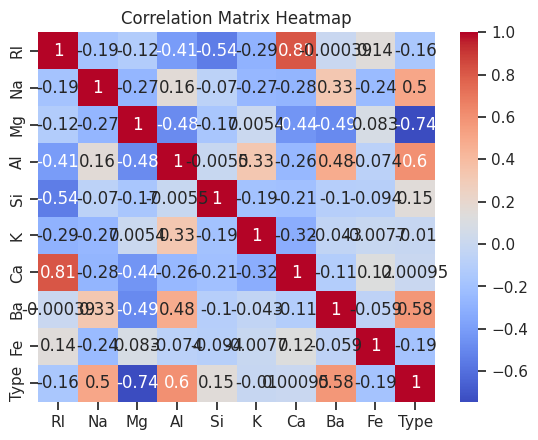

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()